In [1]:
#Add Matplotlib inline magic command
%matplotlib inline
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy as np
import scipy.stats as sts

In [3]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
#Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

In [5]:
#Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

# Creating the merged data set and then the DataFrame for the plot

In [6]:
#Combine the data into a single data set using left join.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
#display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [7]:
#checking the data before new DataFrame is created
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   float64
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 129.9+ KB


In [8]:
#convert the date column from object to datetime
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'], errors='coerce')
pyber_data_df.info()
pyber_data_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   datetime64[ns]
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   float64       
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 129.9+ KB


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban


In [9]:
#Set the index to the date column
pyber_data_df.set_index(pyber_data_df['date'], inplace =True)

In [10]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
date,,,,,,
2019-01-14 10:14:00,Lake Jonathanshire,2019-01-14 10:14:00,13.83,5.739410e+12,5,Urban
2019-03-04 18:24:00,South Michelleport,2019-03-04 18:24:00,30.24,2.343910e+12,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,2019-02-24 04:29:00,33.44,2.005070e+12,57,Urban
2019-02-10 23:22:00,Rodneyfort,2019-02-10 23:22:00,23.44,5.149250e+12,34,Urban
2019-03-06 04:28:00,South Jack,2019-03-06 04:28:00,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2019-04-29 17:04:00,Michaelberg,2019-04-29 17:04:00,13.38,8.550370e+12,6,Rural
2019-01-30 00:05:00,Lake Latoyabury,2019-01-30 00:05:00,20.76,9.018730e+12,2,Rural
2019-02-10 21:03:00,North Jaime,2019-02-10 21:03:00,11.11,2.781340e+12,1,Rural


In [11]:
#Make the new df for fares and include only the 'Date','City type' and 'Fare' columns
pyber_fares_df = pyber_data_df[['date','type','fare']].copy()

In [12]:
#Drop the extra date column(['date'], axis=1, inplace=True)
pyber_fares_df.drop(columns=['date'], axis=1,inplace=True)
pyber_fares_df

,type,fare
date,,
2019-01-14 10:14:00,Urban,13.83
2019-03-04 18:24:00,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:00,Urban,23.44
2019-03-06 04:28:00,Urban,34.58
...,...,...
2019-04-29 17:04:00,Rural,13.38
2019-01-30 00:05:00,Rural,20.76
2019-02-10 21:03:00,Rural,11.11


In [13]:
pyber_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    2375 non-null   object 
 1   fare    2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [14]:
# Get the sum for all of the fares.
sum_of_fares = pyber_fares_df.groupby(["type","date"]).sum()["fare"]
#type(sum_of_fares)

In [15]:
#creating the new DataFrame for fares by type and date, resetting the index
fares_df = pd.DataFrame(sum_of_fares).reset_index()

In [16]:
fares_df

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [17]:
fares_df.pivot(index="date", columns="type")

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:00   NaN      NaN  37.91
2019-01-01 00:46:00   NaN    47.74    NaN
2019-01-01 02:07:00   NaN    24.07    NaN
2019-01-01 03:46:00   NaN      NaN   7.57
2019-01-01 05:23:00   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:00   NaN      NaN  18.45
2019-05-08 07:29:00   NaN      NaN  18.55
2019-05-08 11:38:00   NaN      NaN  19.77
2019-05-08 13:10:00   NaN      NaN  18.04

[2361 rows x 3 columns]

In [18]:
fares_df.loc[(fares_df["date"] >= "2019-01-01") & (fares_df["date"] <= "2019-04-28")]

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2230,Urban,2019-04-27 14:57:00,44.73
2231,Urban,2019-04-27 16:20:00,6.62
2232,Urban,2019-04-27 16:22:00,25.67
2233,Urban,2019-04-27 20:41:00,8.28


In [19]:
#Set the index to the date column
fares_df.set_index(fares_df['date'], inplace =True)

In [20]:
fares_df

,type,date,fare
date,,,
2019-01-01 09:45:00,Rural,2019-01-01 09:45:00,43.69
2019-01-02 11:18:00,Rural,2019-01-02 11:18:00,52.12
2019-01-03 19:51:00,Rural,2019-01-03 19:51:00,19.90
2019-01-04 03:31:00,Rural,2019-01-04 03:31:00,24.88
2019-01-06 07:38:00,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2019-05-08 04:20:00,Urban,2019-05-08 04:20:00,21.99
2019-05-08 04:39:00,Urban,2019-05-08 04:39:00,18.45
2019-05-08 07:29:00,Urban,2019-05-08 07:29:00,18.55


In [21]:
#drop ambiguous date column
#fares_df = fares_df.loc[:,~fares_df.columns.duplicated()]
fares_df.drop(columns=['date'])

,type,fare
date,,
2019-01-01 09:45:00,Rural,43.69
2019-01-02 11:18:00,Rural,52.12
2019-01-03 19:51:00,Rural,19.90
2019-01-04 03:31:00,Rural,24.88
2019-01-06 07:38:00,Rural,47.33
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:00,Urban,18.45
2019-05-08 07:29:00,Urban,18.55


In [22]:
#s_fares_df = fares_df[fares_df["type"] == "Suburban"]
#r_fares_df = fares_df[fares_df["type"] == "Rural"]
#u_fares_df = fares_df[fares_df["type"] == "Urban"]

In [23]:
#u_resample = u_fares_df.fare.resample('W').sum()
#r_resample = r_fares_df.fare.resample('W').sum()
#s_resample = s_fares_df.fare.resample('W').sum()

In [24]:
g_df = fares_df.groupby('type').fare.resample('W').sum()

In [25]:
g_df

type      date      
Rural     2019-01-06     187.92
          2019-01-13      67.65
          2019-01-20     306.00
          2019-01-27     179.69
          2019-02-03     333.08
          2019-02-10     115.80
          2019-02-17      95.82
          2019-02-24     419.06
          2019-03-03     175.14
          2019-03-10     303.94
          2019-03-17     163.39
          2019-03-24     189.76
          2019-03-31     199.42
          2019-04-07     501.24
          2019-04-14     269.79
          2019-04-21     214.14
          2019-04-28     191.85
          2019-05-05     257.42
          2019-05-12     156.82
Suburban  2019-01-06     721.60
          2019-01-13    1105.13
          2019-01-20    1218.20
          2019-01-27    1203.28
          2019-02-03    1042.79
          2019-02-10     974.34
          2019-02-17    1045.50
          2019-02-24    1412.74
          2019-03-03     858.46
          2019-03-10     925.27
          2019-03-17     906.20
          2019-03-2

In [26]:
#make a dataframe from a series.
g_df2 = pd.DataFrame(g_df)
g_df2

fare
type     date               
Rural    2019-01-06   187.92
         2019-01-13    67.65
         2019-01-20   306.00
         2019-01-27   179.69
         2019-02-03   333.08
         2019-02-10   115.80
         2019-02-17    95.82
         2019-02-24   419.06
         2019-03-03   175.14
         2019-03-10   303.94
         2019-03-17   163.39
         2019-03-24   189.76
         2019-03-31   199.42
         2019-04-07   501.24
         2019-04-14   269.79
         2019-04-21   214.14
         2019-04-28   191.85
         2019-05-05   257.42
         2019-05-12   156.82
Suburban 2019-01-06   721.60
         2019-01-13  1105.13
         2019-01-20  1218.20
         2019-01-27  1203.28
         2019-02-03  1042.79
         2019-02-10   974.34
         2019-02-17  1045.50
         2019-02-24  1412.74
         2019-03-03   858.46
         2019-03-10   925.27
         2019-03-17   906.20
         2019-03-24  1122.20
         2019-03-31  1045.06
         2019-04-07  1010.73
         2019-04-14   784.82
         2019-04-21  1149.27
         2019-04-28  1357.75
         2019-05-05  1164.78
         2019-05-12   308.21
Urban    2019-01-06  1661.68
         2019-01-13  2050.43
         2019-01-20  1939.02
         2019-01-27  2129.51
         2019-02-03  2086.94
         2019-02-10  2162.64
         2019-02-17  2235.07
         2019-02-24  2466.29
         2019-03-03  2218.20
         2019-03-10  2470.93
         2019-03-17  2044.42
         2019-03-24  2368.37
         2019-03-31  1942.77
         2019-04-07  2356.70
         2019-04-14  2390.72
         2019-04-21  2303.80
         2019-04-28  2238.29
         2019-05-05  2178.57
         2019-05-12   610.03

In [27]:
#Set the index to the date column
g_df2.reset_index(level='type')

,type,fare
date,,
2019-01-06,Rural,187.92
2019-01-13,Rural,67.65
2019-01-20,Rural,306.00
2019-01-27,Rural,179.69
2019-02-03,Rural,333.08
2019-02-10,Rural,115.80
2019-02-17,Rural,95.82
2019-02-24,Rural,419.06
2019-03-03,Rural,175.14


In [28]:
g_df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 57 entries, ('Rural', Timestamp('2019-01-06 00:00:00', freq='W-SUN')) to ('Urban', Timestamp('2019-05-12 00:00:00', freq='W-SUN'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fare    57 non-null     float64
dtypes: float64(1)
memory usage: 862.0+ bytes


In [29]:
#convert the date column from object to datetime
#g_df2['date'] = pd.to_datetime(g_df2['date'], errors='coerce')

In [30]:
#Add Matplotlib inline magic command
%matplotlib inline
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

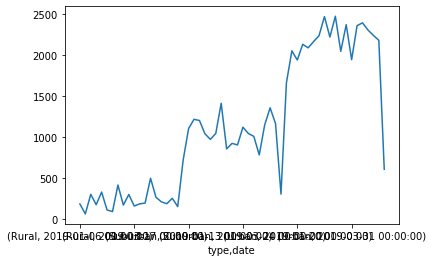

In [33]:
g_df.plot(x='date', y='fare', kind = 'line');